<a href="https://colab.research.google.com/github/JonathanStiefel/Drawing-Recognition/blob/main/Doodle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Doodle Machine Learning Model
## Load Data

--2024-06-30 16:30:09--  https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/airplane.npy
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.215.207, 173.194.216.207, 108.177.12.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.215.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 118872512 (113M) [application/octet-stream]
Saving to: ‘airplane.npy’

airplane.npy        100%[===================>] 113.37M   126MB/s    in 0.9s    

2024-06-30 16:30:10 (126 MB/s) - ‘airplane.npy’ saved [118872512/118872512]



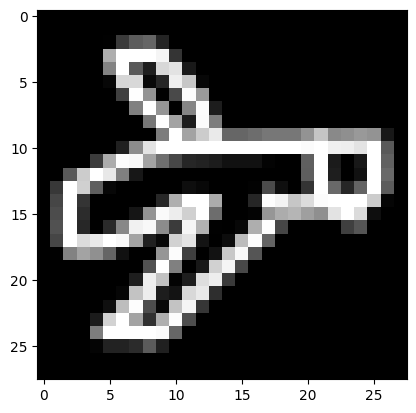

In [ ]:
!wget https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/airplane.npy

import numpy as np

# Load the data
airplane = np.load('airplane.npy')

# Each row in the data represents a 28x28 image flattened into a 784-length vector
airplane_images = airplane.reshape(-1, 28, 28)

# Example to visualize one of the drawings
import matplotlib.pyplot as plt
plt.imshow(airplane_images[0], cmap='gray')
plt.show()


## Create Model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Normalize the images
airplane_images = airplane_images / 255.0

# Define the model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(345, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Assuming labels are available for training
labels = np.zeros(airplane_images.shape[0])  # Dummy labels for the example

# Train the model
model.fit(airplane_images, labels, epochs=10, validation_split=0.2)


Epoch 1/10
3791/3791 [==============================] - 124s 32ms/step - loss: 0.0080 - accuracy: 0.9997 - val_loss: 2.3861e-09 - val_accuracy: 1.0000
Epoch 2/10
3791/3791 [==============================] - 115s 30ms/step - loss: 2.6807e-08 - accuracy: 1.0000 - val_loss: 1.5331e-10 - val_accuracy: 1.0000
Epoch 3/10
3791/3791 [==============================] - 116s 31ms/step - loss: 4.0359e-09 - accuracy: 1.0000 - val_loss: 2.3586e-11 - val_accuracy: 1.0000
Epoch 4/10
3791/3791 [==============================] - 115s 30ms/step - loss: 6.8794e-10 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/10
3791/3791 [==============================] - 115s 30ms/step - loss: 1.3464e-10 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/10
3791/3791 [==============================] - 113s 30ms/step - loss: 3.0466e-11 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/10
3791/3791 [==============================] - 113s 30ms/step - l